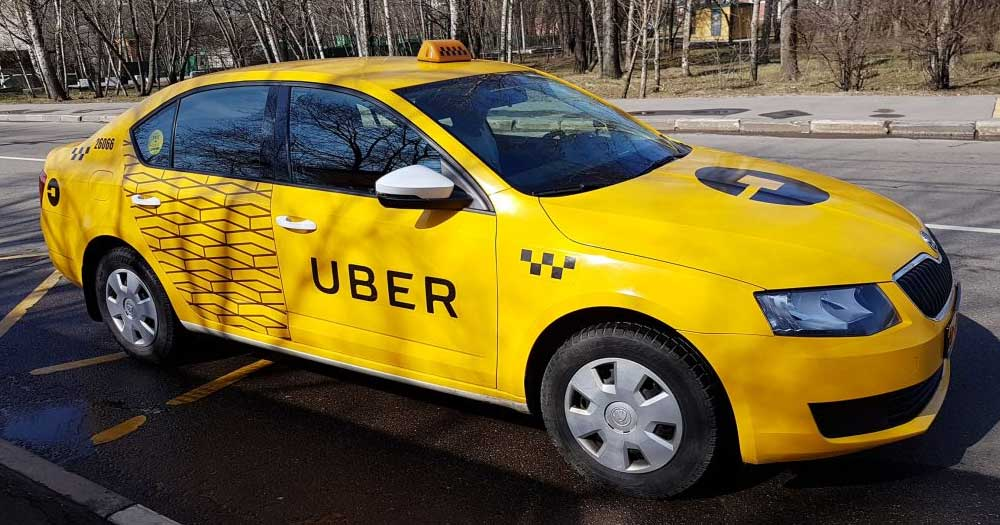

## Problem Statement:
**The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately**.

### Task:
1. **Understand the Dataset & cleanup (if required).**
2. **Build Regression models to predict the fare price of uber ride.**
3. **Also evaluate the models & compare thier respective scores like R2, RMSE, etc**

### About Dataset
**The dataset contains the following fields:**
- key - a unique identifier for each trip
- fare_amount - the cost of each trip in usd
- pickup_datetime - date and time when the meter was engaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged

### Import basic packages or libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Basic Information about dataset

In [3]:
df.shape

(200000, 9)

In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### Missing values

In [6]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

#### There 2 missing rows so lets drop them.

In [7]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Statitical info

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,199999.0,27712478.56,16013858.31,1.00,13825336.50,27745245.00,41555348.50,55423567.00
fare_amount,199999.0,11.36,9.90,-52.00,6.00,8.50,12.50,499.00
pickup_longitude,199999.0,-72.53,11.44,-1340.65,-73.99,-73.98,-73.97,57.42
pickup_latitude,199999.0,39.94,7.72,-74.02,40.73,40.75,40.77,1644.42
dropoff_longitude,199999.0,-72.53,13.12,-3356.67,-73.99,-73.98,-73.96,1153.57
dropoff_latitude,199999.0,39.92,6.79,-881.99,40.73,40.75,40.77,872.70
passenger_count,199999.0,1.68,1.39,0.00,1.00,1.00,2.00,208.00


In [9]:
df.describe(include='object').T

,count,unique,top,freq
key,199999,199999,2015-05-07 19:52:06.0000003,1
pickup_datetime,199999,196628,2014-04-13 18:19:00 UTC,4


### For further analysis "Key column" and "Unnamed : 0" are not important, so lets drop them.

In [10]:
df.drop(['key','Unnamed: 0'], axis=1, inplace=True)
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

### Exploratory Data Analysis

### Analyze Fare Ammount column

In [11]:
df['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

#### Fare amount distribution

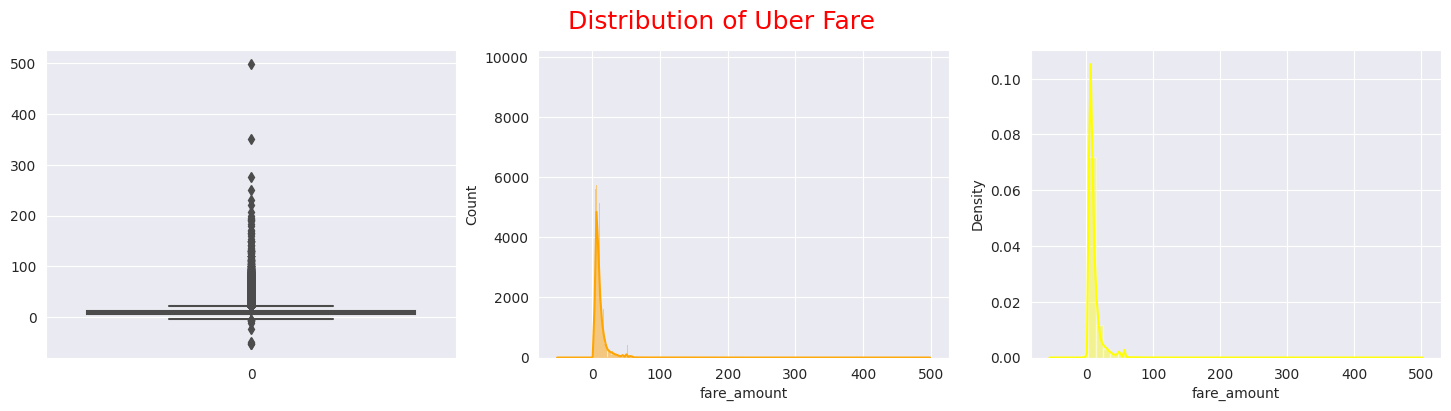

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['fare_amount'], color='blue')

plt.subplot(132)
sns.histplot(df['fare_amount'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['fare_amount'], color='yellow')

plt.suptitle("Distribution of Uber Fare", fontsize=18, color='red');

#### From above graphs we got to know that there are data points which are below 0 and fare cannot be less than 0 for uber trip. So lets check these rows and try to handle these outliers.

In [13]:
df[df['fare_amount']<=0].shape

(22, 7)

#### There are only 22 rows which have fare less than or equal to 0 dollar, our dataset contains 200000 rows so these outliers are just 0.00001% of total rows so we can afford droping these rows.

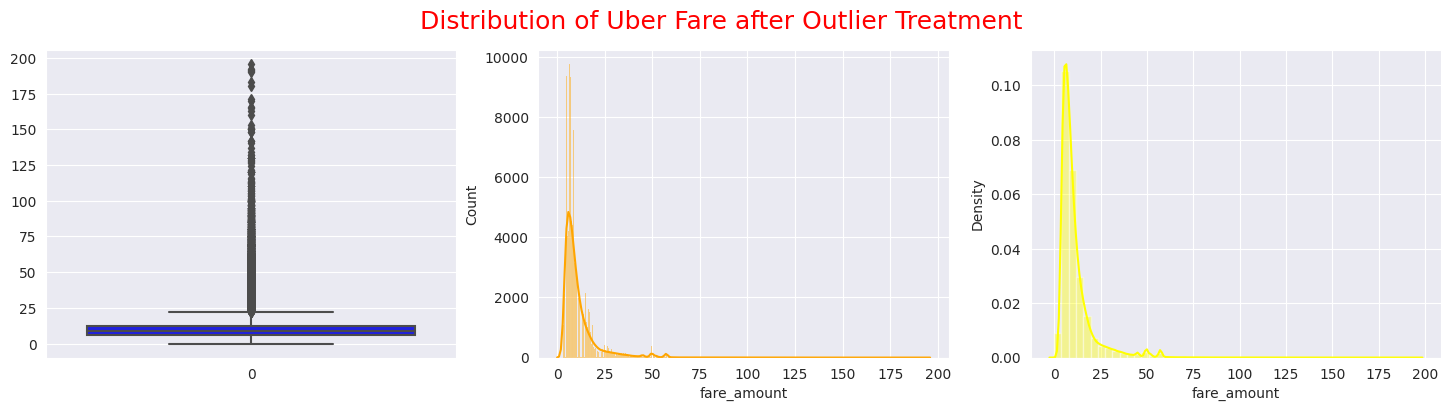

In [14]:
df=df[(df['fare_amount']>0) & (df['fare_amount']<200)]  #selecting only those rows which have fare amount>0
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['fare_amount'], color='blue')

plt.subplot(132)
sns.histplot(df['fare_amount'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['fare_amount'], color='yellow')

plt.suptitle("Distribution of Uber Fare after Outlier Treatment", fontsize=18, color='red');

### Analyze Pick Date time column

In [15]:
df['pickup_datetime'][:5]

0    2015-05-07 19:52:06 UTC
1    2009-07-17 20:04:56 UTC
2    2009-08-24 21:45:00 UTC
3    2009-06-26 08:22:21 UTC
4    2014-08-28 17:47:00 UTC
Name: pickup_datetime, dtype: object

In [16]:
df['pickup_datetime'].dtype

dtype('O')

In [17]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'].dtype

datetime64[ns, UTC]

### Extract Features

#### Extracting Year, Month and Day of the Uber Trip

In [18]:
df['year']=df['pickup_datetime'].dt.year
df['day']=df['pickup_datetime'].dt.day
df['month']=df['pickup_datetime'].dt.month
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,7


#### Extract Weekday and weekend

In [19]:
df['weekday']=df['pickup_datetime'].dt.weekday
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,5,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,7,4


In [22]:
def isweekend(day):
    if day==6 or day==0:
        return 1
    else:
        return 0

df['weekend']=df['weekday'].apply(isweekend)

In [23]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,weekend
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,5,3,0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,7,4,0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,8,0,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,6,4,0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,8,3,0


#### Extract time and create bins

In [24]:
df['time']=df['pickup_datetime'].dt.time
df['time'][:5]

0    19:52:06
1    20:04:56
2    21:45:00
3    08:22:21
4    17:47:00
Name: time, dtype: object

In [42]:
df['time']=df['time'].astype(str)
df[['hour','minutes','seconds']]=df['time'].str.split(":", expand=True)

In [43]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,month,weekday,weekend,time,hour,minutes,seconds
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,5,3,0,19:52:06,19,52,06
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,7,4,0,20:04:56,20,04,56
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,8,0,1,21:45:00,21,45,00
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,6,4,0,08:22:21,08,22,21
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,8,3,0,17:47:00,17,47,00


#### Drop unwanted columns

In [44]:
df.drop(['pickup_datetime','time','minutes','seconds'], axis=1, inplace=True)
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'day', 'month', 'weekday', 'weekend', 'hour'],
      dtype='object')

### Analyze Passangers count

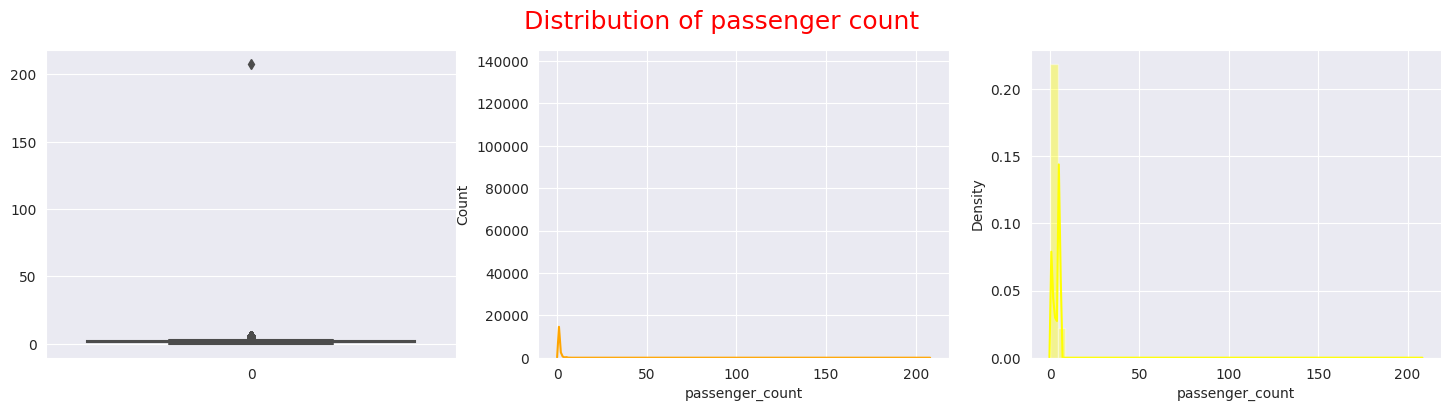

In [50]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['passenger_count'], color='blue')

plt.subplot(132)
sns.histplot(df['passenger_count'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['passenger_count'], color='yellow')

plt.suptitle("Distribution of passenger count", fontsize=18, color='red');

#### Uber Taxi cannot have Passengers count 200. 

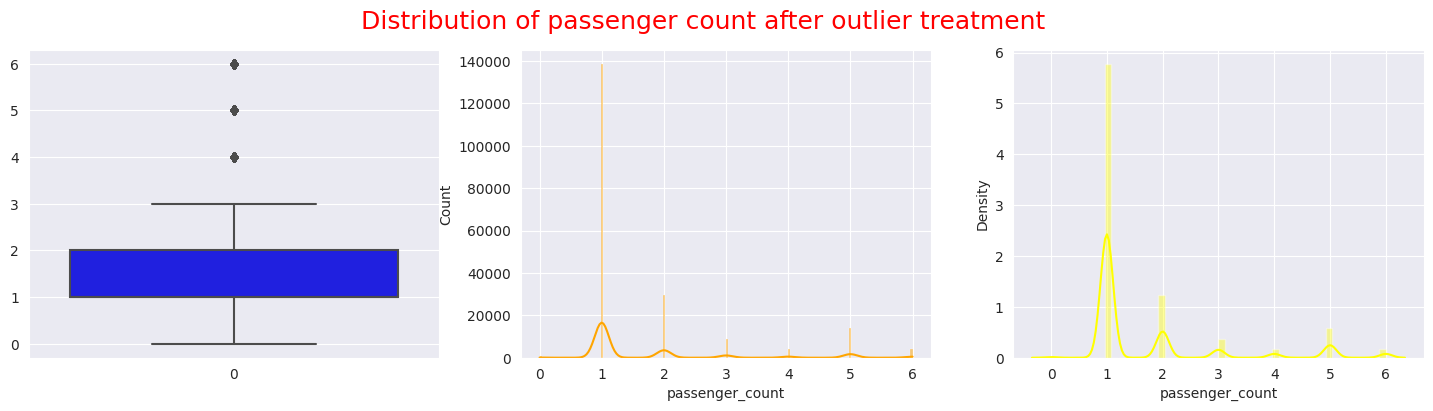

In [52]:
df=df[df['passenger_count']<200]
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot(df['passenger_count'], color='blue')

plt.subplot(132)
sns.histplot(df['passenger_count'], color='orange', kde=True)

plt.subplot(133)
sns.distplot(df['passenger_count'], color='yellow')

plt.suptitle("Distribution of passenger count after outlier treatment", fontsize=18, color='red');

### Relationship between numerical column to fare amount

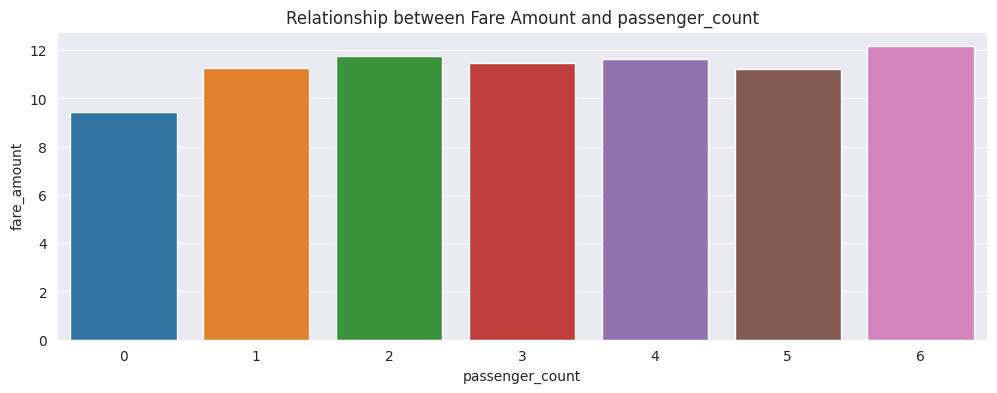

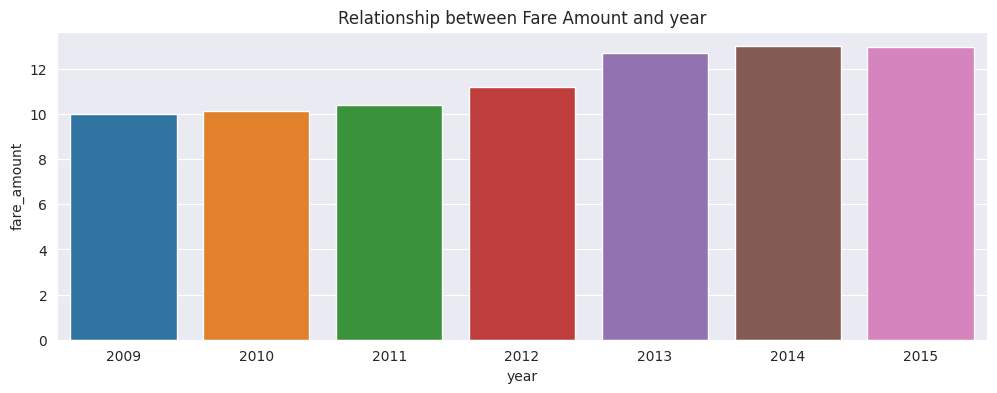

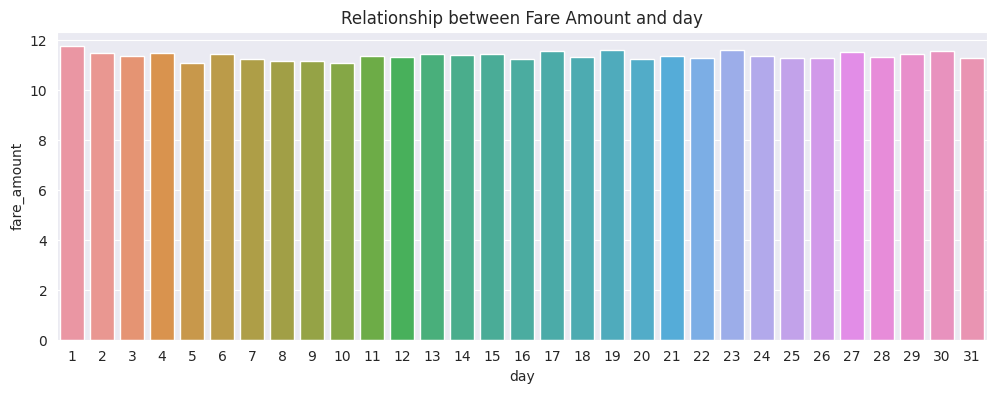

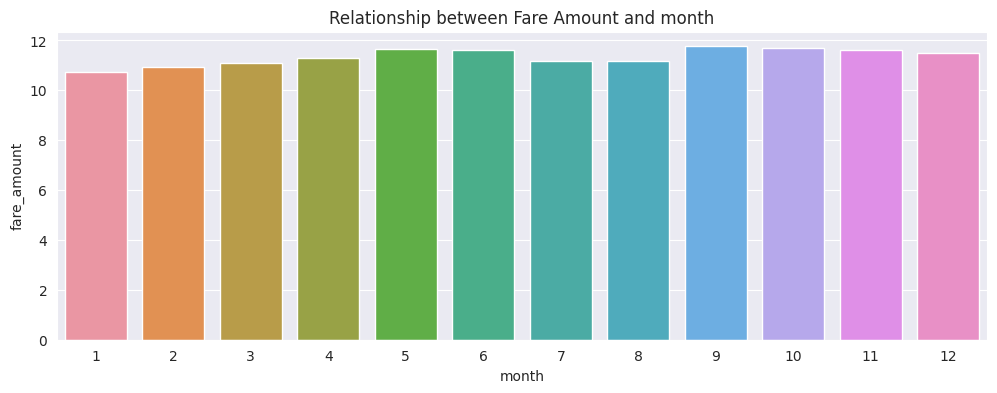

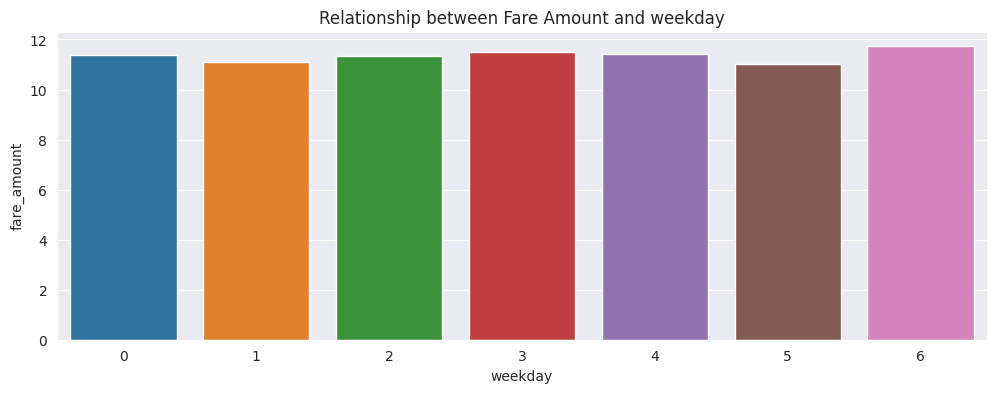

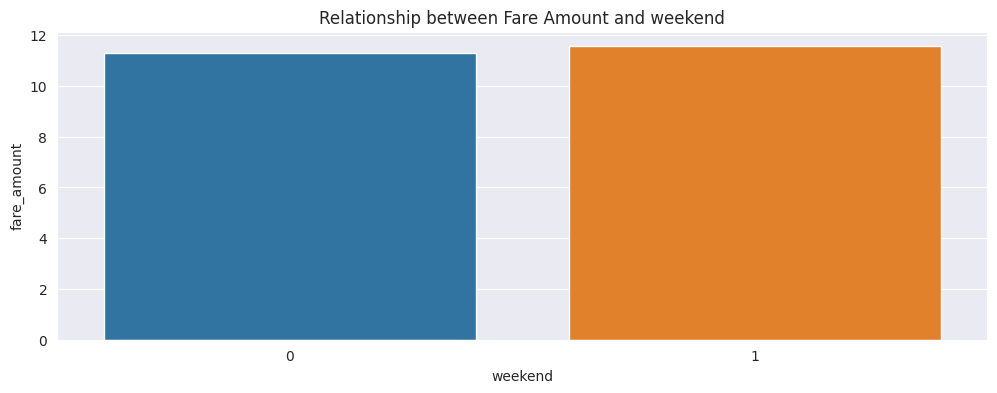

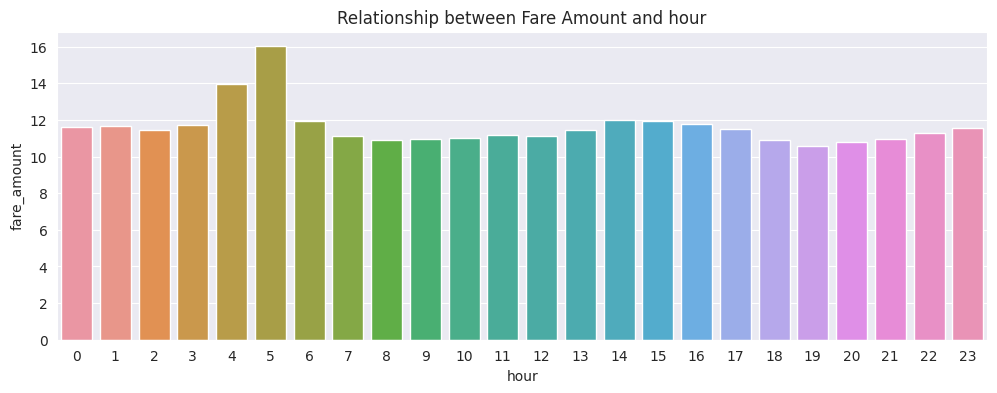

In [54]:
num_col=['passenger_count','year', 'day', 'month', 'weekday', 'weekend', 'hour']
num_col_df=df[num_col].astype(int)
for col in num_col_df[num_col]:
    plt.figure(figsize=(12,4))
    sns.barplot(y=df['fare_amount'], x=num_col_df[col], ci=None)
    plt.title("Relationship between Fare Amount and {}".format(col));

### Correlation Matrix

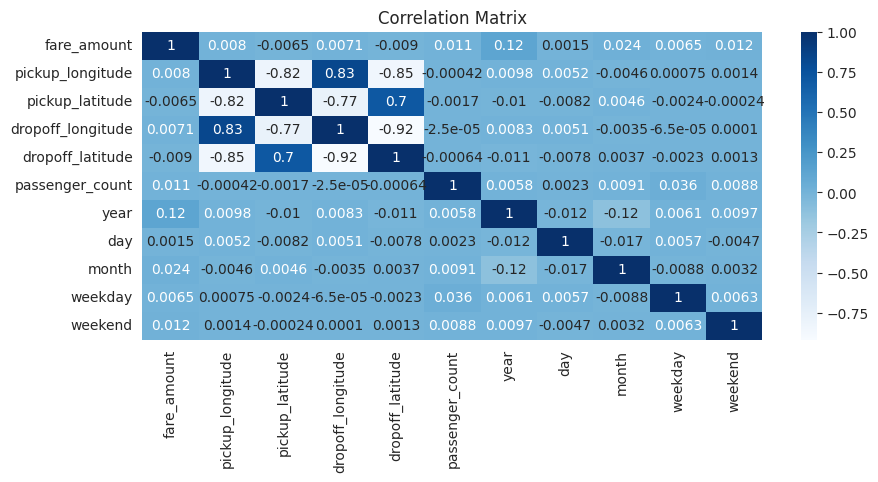

In [61]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix");

#### Correlation coefficient is not close to 1 means there is no strong correlation between fare amount and rest of the input columns.

### Input and output features

In [63]:
X=df.drop('fare_amount', axis=1)
y=df['fare_amount']

### Train test split

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(149976, 11) (49992, 11) (149976,) (49992,)


### Standardizing data so that deep learning model train faster

In [65]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler_fit=std_scaler.fit(x_train)
x_train_tf=std_scaler_fit.transform(x_train)
x_test_tf=std_scaler_fit.transform(x_test)
x_train_tf[:5]

array([[-0.12646746,  0.10922213, -0.10911668,  0.12456411, -0.52338818,
        -0.93708166, -1.69317414,  1.66012365, -0.53964367, -0.59074872,
         0.99925928],
       [-0.12611621,  0.11139236, -0.09920699,  0.12094897, -0.52338818,
        -1.47514822,  0.14898129,  0.78798914, -0.02620008, -0.59074872,
        -2.06590471],
       [-0.12409055,  0.11018967, -0.10402251,  0.13524035, -0.52338818,
         0.67711804, -1.00236585, -0.66556838,  1.51413067,  1.6927671 ,
        -0.53332272],
       [-0.1265837 ,  0.10406393, -0.10806218,  0.12201932,  0.24093928,
        -0.93708166,  1.30032844,  1.36941215,  1.00068709, -0.59074872,
        -2.06590471],
       [-0.12429071,  0.11029699, -0.10687007,  0.13225752,  0.24093928,
         1.21518461,  0.03384658, -0.66556838, -0.53964367, -0.59074872,
         0.99925928]])

### Deep Learning Regression Model

In [62]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [71]:
model=Sequential()
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=11))
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=120, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=252, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                384       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 120)               7800      
                                                                 
 dense_11 (Dense)            (None, 252)               30492     
                                                                 
 dense_12 (Dense)            (None, 512)               129536    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)              

In [72]:
model.fit(x_train_tf,y_train, epochs=5, batch_size=10, validation_data=(x_test_tf,y_test))

Epoch 1/5
14998/14998 [==============================] - 170s 11ms/step - loss: 94.5820 - mean_squared_error: 94.5819 - val_loss: 93.5377 - val_mean_squared_error: 93.5377
Epoch 2/5
14998/14998 [==============================] - 164s 11ms/step - loss: 94.1206 - mean_squared_error: 94.1206 - val_loss: 93.2489 - val_mean_squared_error: 93.2489
Epoch 3/5
14998/14998 [==============================] - 167s 11ms/step - loss: 93.4816 - mean_squared_error: 93.4816 - val_loss: 93.1133 - val_mean_squared_error: 93.1133
Epoch 4/5
14998/14998 [==============================] - 166s 11ms/step - loss: 93.3614 - mean_squared_error: 93.3614 - val_loss: 93.4875 - val_mean_squared_error: 93.4875
Epoch 5/5
14998/14998 [==============================] - 165s 11ms/step - loss: 93.2520 - mean_squared_error: 93.2520 - val_loss: 94.9655 - val_mean_squared_error: 94.9655


### Predictions

In [73]:
y_pred=model.predict(x_test_tf)
y_pred[:10]

1563/1563 [==============================] - 5s 3ms/step


array([[14.481026],
       [14.157584],
       [11.374361],
       [11.326929],
       [14.548999],
       [11.317354],
       [14.062456],
       [14.018048],
       [12.29294 ],
       [11.270435]], dtype=float32)

### Evaluation of model

In [76]:
from sklearn.metrics import mean_squared_error as mse
print("MSE=",mse(y_test,y_pred))

MSE= 94.96543334061016
